In [2]:
%run homogeneousRelation.ipynb

........................................................................
----------------------------------------------------------------------
Ran 72 tests in 0.100s

OK
...........
----------------------------------------------------------------------
Ran 11 tests in 0.014s

OK
.................
----------------------------------------------------------------------
Ran 17 tests in 0.018s

OK


In [3]:
class PartialOrder(HomogeneousRelation):
    
    def __init__(self,relation,domain,check=False):
        super().__init__(relation, domain, check)
        if check == True and self.is_partial_order() == False:
            raise Exception(f"Binary relation {(relation, domain)} is not partial order!")
        
    def __homogeneous_to_partial(self, other):
        return PartialOrder(other.get_relation(), other.get_domain(), True)
    
    def union(self, other,check=True):
        return self.__homogeneous_to_partial(super().union(other,check))
    
    def __or__(self, other):
        return self.union(other)
        
    def intersection(self, other,check=True):
        return self.__homogeneous_to_partial(super().intersection(other,check))
    
    def __and__(self, other):
        return self.intersection(other)
        
    def difference(self, other,check=True):
        return self.__homogeneous_to_partial(super().difference(other,check))
    
    def __sub__(self, other):
        return self.difference(other)
    
    def symmetric_difference(self, other,check=False):
        return self.__homogeneous_to_partial(super().symmetric_difference(other,check))
    
    def __xor__(self, other):
        return self.symmetric_difference(other)
        
    def complement(self):
        return self.__homogeneous_to_partial(super().complement())
    
    def composition(self, other):
        return self.__homogeneous_to_partial(super().composition(other))
    
    def converse(self):
        return self.__homogeneous_to_partial(super().converse())
        
    def greatest_element(self):
        maximal_elements = [x for x in self.maximum()]
        if len(maximal_elements) != 1:
            return None
        for element in maximal_elements:
            if {y for y in self.is_out_relation_with(maximal_elements[0])} == self.get_domain():
                return element
        return None  
        
    def least_element(self):
        minimal_elements = [x for x in self.minimum()]
        if len(minimal_elements) != 1:
            return None
        for element in minimal_elements:
            if {y for y in self.is_in_relation_with(minimal_elements[0])} == self.get_domain():
                return element
        return None   
        
    def maximum(self):
        for x in self.get_domain():
            if {y for y in self.is_in_relation_with(x)} == {x}:
                yield x
        
    def minimum(self):
        for x in self.get_domain():
            if {y for y in self.is_out_relation_with(x)} == {x}:
                yield x
    
    def is_total_order(self):
        for x in self.get_domain():
            for y in self.get_domain():
                if not((x,y) in self.get_relation() or (y,x) in self.get_relation()):
                    return False
        return True
    
    def supremum(self, args):
        try:
            tc = self.transitive_closure()
            result = None
            for x in self.get_domain():
                h = True
                for element in args:
                    if x not in tc[element]:
                        h = False
                if h == True:
                    if result is None:
                        result = x
                    elif x not in tc[result]:
                        result = x
            return result
        except KeyError:
            return None
    
    def infimum(self, args):
        try:
            tc = self.transitive_closure()
            result = None
            for x in self.get_domain():
                h = True
                for element in args:
                    if element not in tc[x]:
                        h = False
                if h == True:
                    if result is None:
                        result = x
                    elif result not in tc[x]:
                        result = x
            return result
        except KeyError:
            return None
        
    def is_lattice(self):
        for x,y in self.cartesian_product():
            if self.infimum([x,y]) is None or self.supremum([x,y]) is None:
                return False
        return True
            
        
    def transitive_closure(self):
        result = dict()
        for x in self.get_domain():
            for y in self.is_out_relation_with(x):
                if x not in result.keys():
                    result[x] = {z for z in self.is_out_relation_with(y)}
                else:
                    result[x] = result[x].union({z for z in self.is_out_relation_with(y)})
        return result
    
    def show_graph(self):
        return HasseDiagram("hasse diagram", Subgraph(self)).create_graph()

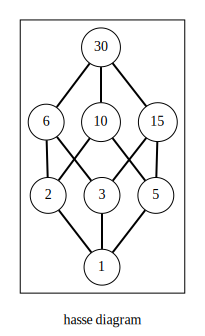

In [7]:
s = {1,2,3,5,6,10,15,30}
    
r = {(x,y) for x in s for y in s}

br = set()
for a,b in r:
    if b % a == 0:
        br.add((a,b))

relation1 = PartialOrder(br, s, True)

#relation1
# #relation1.show_matrix()
relation1.show_graph()

In [41]:
import unittest

class TestNotebook_partialOrder(unittest.TestCase):

    A = {1,2,3}
    B = {4,5,6}
    
    def test_valid_partial_order(self):
        r = PartialOrder({(1,1),(2,2),(3,3),(2,1),(3,1),(3,2)},self.A,True)
        self.assertEqual(r.is_partial_order(), True)
        
    def test_not_valid_partial_order(self):
        self.assertRaises(Exception, PartialOrder,{(1,1),(2,2),(2,1),(3,1),(3,2)},self.A,True)
        
    def test_greatest_element(self):
        r = PartialOrder({(1,1),(2,2),(3,3),(2,1),(3,1),(3,2)},self.A,True)
        self.assertEqual(r.greatest_element(), 3)
        
    def test_least_element(self):
        r = PartialOrder({(1,1),(2,2),(3,3),(2,1),(3,1),(3,2)},self.A,True)
        self.assertEqual(r.least_element(), 1)
        
    def test_maximum(self):
        r = PartialOrder({(1,1),(2,2),(3,3),(2,1),(3,1),(3,2)},self.A,True)
        self.assertEqual([_ for _ in r.maximum()], [3])
        
    def test_minimum(self):
        r = PartialOrder({(1,1),(2,2),(3,3),(2,1),(3,1),(3,2)},self.A,True)
        self.assertEqual([_ for _ in r.minimum()], [1])
        
    def test_is_total_order(self):
        r = PartialOrder({(1,1),(2,2),(3,3),(2,1),(3,1),(3,2)},self.A,True)
        self.assertEqual(r.is_total_order(), True)
        
    def test_supremum(self):
        a = {x for x in range(1,24+1) if 24 % x == 0}
        relation = {(x,y) for x in a for y in a if y % x == 0}
        r = PartialOrder(relation, a)
        b = {8,3}
        self.assertEqual(r.supremum(b), 24)   
        
    def test_infimum(self):
        a = {x for x in range(1,24+1) if 24 % x == 0}
        relation = {(x,y) for x in a for y in a if y % x == 0}
        r = PartialOrder(relation, a)
        b = {8,6}
        self.assertEqual(r.infimum(b), 2)
        
    def test_is_lattice(self):
        p = PartialOrder({(1,1),(1,2),(1,3),(2,2),(2,3),(3,3)}, self.A,True)
        self.assertEqual(p.is_lattice(), True)

    
        
unittest.main(argv=[''], verbosity=1, exit=False)

...........................
----------------------------------------------------------------------
Ran 27 tests in 0.033s

OK


In [28]:
# r = PartialOrder({(1,1),(2,2),(3,3),(2,1),(3,1),(3,2)},{1,2,3})
# print(f"R = {r}")

# print([p for p in r.maximum()])
# print([p for p in r.minimum()])
# print(r.greatest_element())
# print(r.least_element())
# print(r.is_partial_order())
# print(r.is_total_order())

R = domain:   {1, 2, 3}  
codomain: {1, 2, 3}
relation: {(3, 3), (2, 1), (2, 2), (3, 1), (1, 1), (3, 2)}

[3]
[1]
3
1
True
True


In [5]:
# print([p for p in r.is_out_relation_with(1)] == [1])

In [6]:
# s = FiniteSet(1,2,3,4,5,6,10,12,15,20,30,60)
    
# r = s ** 2

# br = set()
# for a,b in r:
#     if b % a == 0:
#         br.add((a,b))
        
# p = PartialOrder(br, s)


# print(p.infimum([4,10]))
# print(p.supremum([4,10]))

# print(p.infimum([4,6,10]))
# print(p.supremum([4,6,10]))

# print(p.infimum([4,6,10,15]))
# print(p.supremum([4,6,10,15]))

# print(p.infimum([60,3]))
# print(p.supremum([60,3]))

# print("-"*10)

# print(p.is_partial_order())
# print(p.is_total_order())
# print([x for x in p.maximum()])
# print(p.greatest_element())
# print([x for x in p.minimum()])
# print(p.least_element())

In [7]:
#print(f"lattice? -> {p.is_lattice()}")

In [8]:
# def divisors(n):
#     return {x for x in range(1,n+1) if n % x == 0}
# n = 24 # 12 24 60 360 ...
# A = divisors(n)
# #A = divisors(n) - {1, n}
# #relation = {(x, y) for x in A for y in A if y % x == 0}
# A = FiniteSet(*A)
# relation = {(x, y) for (x, y) in A * A if y % x == 0}
# R = PartialOrder(relation, A)
# R

In [9]:
#print(R.is_partial_order())
#print(R.is_total_order())
#print([p for p in R.maximum()])
#print(R.greatest_element())
#print([p for p in R.minimum()])
#print(R.least_element())

In [10]:
#B = {8,6}
#B = {24, 30}
#print(R.infimum(B))
#print(R.supremum(B))

In [11]:
#r = PartialOrder({(1,1),(2,2),(3,3),(2,1),(3,1),(3,2)},{1,2,3})
#print(r)
#print(r.infimum({1,2}))
#print(r.supremum({1,2}))

In [12]:
#A = FiniteSet(1,2,3)
#B = FiniteSet(4,5,6)
#x = {p for p in A * B}
#print(x)

In [13]:
#len(r)